In [145]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SUQC_ODE_simulation(N,a,b,c,T,I0):
    """
    An ODE simulation that model time dependent variables: S, I, R
    
    N: N individuals the population has
    
    a: the number of individuals infected by an unquarantined individual per day
    
    b: the rate at which the cases are confirmed
    
    c: the rate at which unquarantined and infected individuals get quarantined
    
    T: simulation time period
    
    I0: Initial number of infectious and unquarantined individuals
    
    """
    def f(t, v):
        """
        v = [S, U, Q, C]
        
        """
        dSdt = - (a * v[1] * v[0]) / N
        dUdt = (a * v[1] * v[0]) / N - c * v[1]
        dQdt = c * v[1] - b * v[2]
        dCdt = b * v[2]
        return [dSdt, dUdt, dQdt, dCdt]
    
    def bal_state(t, v):
        return (a * v[1] * v[0]) / N - 1
    
    v0 = [(N-I0),I0,0,0]
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval, events=bal_state)
    return sol

In [146]:
# N = 10000
# T = 100
# I0 = 10
# a = 1
# b = 0.1
# c = 0.5

# sol = SUQC_ODE_simulation(N,a,b,c,T,I0)
# plt.plot(sol.t, sol.y[0], label="susceptible", c='g')
# plt.plot(sol.t, sol.y[1], label="unquarantined", c='r')
# plt.plot(sol.t, sol.y[2], label="quarantined", c='b')
# plt.plot(sol.t, sol.y[3], label="confirmed", c='y')
# plt.plot(sol.t, sol.y[1]+sol.y[2]+sol.y[3], label="infected", c='m')
# plt.legend()
# plt.show

In [147]:
# ind = np.ceil(sol.t_events)
# print(ind)
# print(sol.y_events)

In [148]:
# sol.y[0][82]

In [149]:
# sol.y[0][int(ind)]

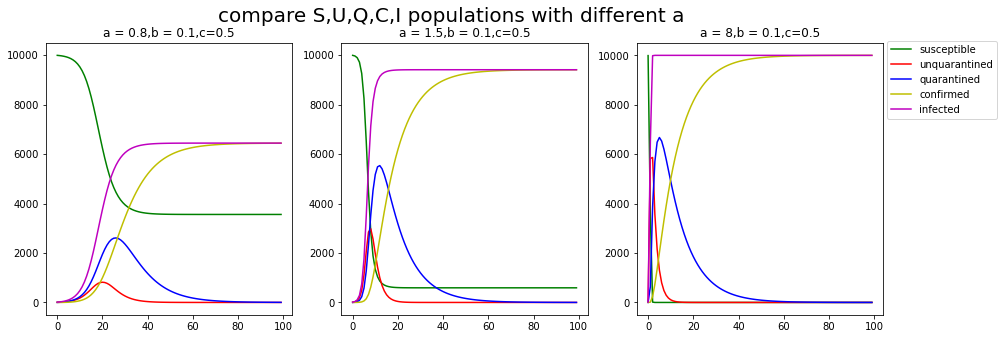

In [189]:
N = 10000
T = 100
I0 = 10
a_list = [0.8, 1.5, 8]
b_list = [0.1, 0.5, 1]
c_list = [0.1, 0.5, 0.8]
bal_state_list = []

m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(15,5))
fig.suptitle("compare S,U,Q,C,I populations with different a",fontsize=20)

for i,a in enumerate(a_list):
    b = b_list[0]
    c = c_list[1]
    sol = SUQC_ODE_simulation(N,a,b,c,T,I0)
    bal_state_day = int(np.ceil(sol.t_events))
    bal_state_S = int(np.ceil(sol.y[0][bal_state_day]))
    bal_state_I = int(np.ceil(N - bal_state_S))
    bal_state_list.append([bal_state_day,bal_state_S,bal_state_I])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="unquarantined", c='r')
    ax[i].plot(sol.t, sol.y[2], label="quarantined", c='b')
    ax[i].plot(sol.t, sol.y[3], label="confirmed", c='y')
    ax[i].plot(sol.t, sol.y[1]+sol.y[2]+sol.y[3], label="infected", c='m')
    ax[i].set_title(f"a = {str(a_list[i])},b = {b},c={c}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')


In [190]:
for i in range(3):
    print('a =', a_list[i], 
          ', balance day =', bal_state_list[i][0],
          ', balance number of the susceptibles =', bal_state_list[i][1],
          ', balance number of the infected =', bal_state_list[i][2],)

a = 0.8 , balance day = 51 , balance number of the susceptibles = 3562 , balance number of the infected = 6438
a = 1.5 , balance day = 24 , balance number of the susceptibles = 594 , balance number of the infected = 9406
a = 8 , balance day = 3 , balance number of the susceptibles = 1 , balance number of the infected = 9999


### The balance day is approximately calculated by $\lceil\frac{dS}{dt}\rceil$, and the balance number of susceptibles are also rounds up to the nearest integer

### The parameter $a$ represents the number of individuals infected by an unquarantined individual per day. According to the graph and data above, with larger a, the system reaches the balance state more quickly. Also there will be more infected individuals and less susceptible individuals after this time period.

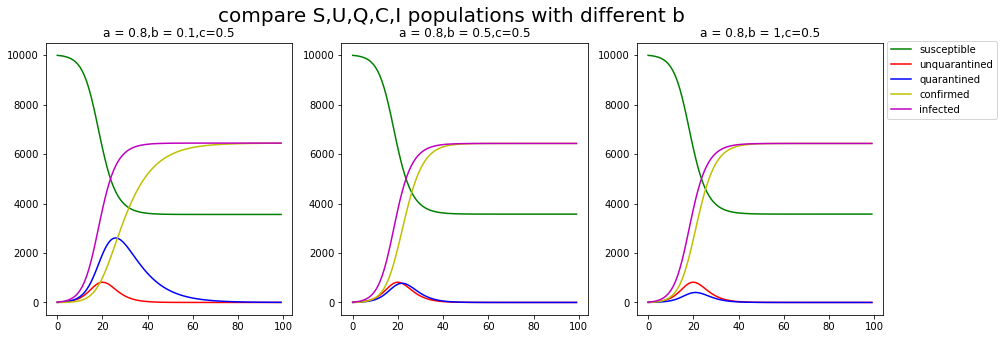

In [183]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(15,5))
fig.suptitle("compare S,U,Q,C,I populations with different b",fontsize=20)
bal_state_list = []

for i,b in enumerate(b_list):
    a = a_list[0]
    c = c_list[1]
    sol = SUQC_ODE_simulation(N,a,b,c,T,I0)
    bal_state_day = int(np.ceil(sol.t_events))
    bal_state_S = int(np.ceil(sol.y[0][bal_state_day]))
    bal_state_I = int(np.ceil(N - bal_state_S))
    bal_state_list.append([bal_state_day,bal_state_S,bal_state_I])
    
    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="unquarantined", c='r')
    ax[i].plot(sol.t, sol.y[2], label="quarantined", c='b')
    ax[i].plot(sol.t, sol.y[3], label="confirmed", c='y')
    ax[i].plot(sol.t, sol.y[1]+sol.y[2]+sol.y[3], label="infected", c='m')
    ax[i].set_title(f"a = {a},b = {str(b_list[i])},c={c}")
    
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')


In [184]:
for i in range(3):
    print('b =', b_list[i], 
          ', balance day =', bal_state_list[i][0],
          ', balance number of the susceptibles =', bal_state_list[i][1],
          ', balance number of the infected =', bal_state_list[i][2],)

b = 0.1 balance day = 51 balance number of the susceptibles = 3562 balance number of the infected = 6438
b = 0.5 balance day = 51 balance number of the susceptibles = 3576 balance number of the infected = 6424
b = 1 balance day = 51 balance number of the susceptibles = 3577 balance number of the infected = 6423


### The parameter $b$ represents the rate at which the cases are confirmed, which only affect the speed of $Q$ (the infected & quarantined) transformed to $C$ (the confirmed case). Since both $Q$ and $C$ lose ability to infect the susceptibles, the changes of $b$ does not exert much influence on the final amount of the infected and the susceptible.


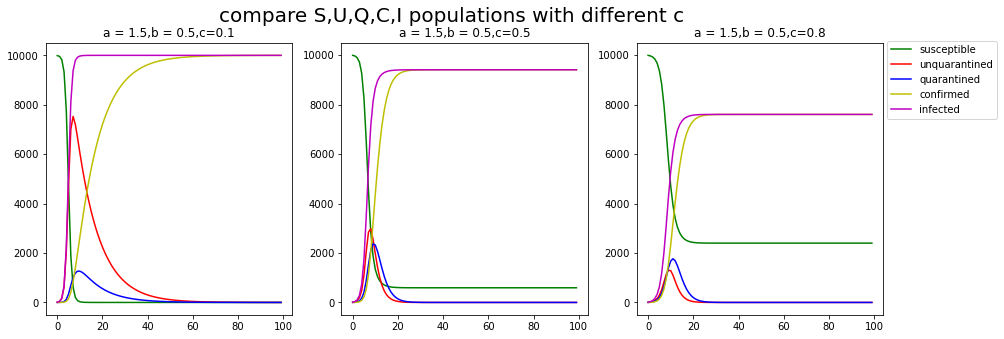

In [186]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(15,5))
fig.suptitle("compare S,U,Q,C,I populations with different c",fontsize=20)
bal_state_list = []

for i,c in enumerate(c_list):
    a = a_list[1]
    b = b_list[1]
    sol = SUQC_ODE_simulation(N,a,b,c,T,I0)
    bal_state_day = int(np.ceil(sol.t_events))
    bal_state_S = int(np.ceil(sol.y[0][bal_state_day]))
    bal_state_I = int(np.ceil(N - bal_state_S))
    bal_state_list.append([bal_state_day,bal_state_S,bal_state_I])
    
    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="unquarantined", c='r')
    ax[i].plot(sol.t, sol.y[2], label="quarantined", c='b')
    ax[i].plot(sol.t, sol.y[3], label="confirmed", c='y')
    ax[i].plot(sol.t, sol.y[1]+sol.y[2]+sol.y[3], label="infected", c='m')
    ax[i].set_title(f"a = {a},b = {b},c={str(c_list[i])}")
    
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')


In [188]:
for i in range(3):
    print('c =', c_list[i], 
          ', balance day =', bal_state_list[i][0],
          ', balance number of the susceptibles =', bal_state_list[i][1],
          ', balance number of the infected =', bal_state_list[i][2],)

c = 0.1 , balance day = 14 , balance number of the susceptibles = 2 , balance number of the infected = 9998
c = 0.5 , balance day = 24 , balance number of the susceptibles = 595 , balance number of the infected = 9405
c = 0.8 , balance day = 26 , balance number of the susceptibles = 2401 , balance number of the infected = 7599


### The parameter $c$ represents the rate at which unquarantined and infected individuals get quarantined. With the data above, it is easy to see that, promoting quarantine plays a significant role in decreasing the number of infected individuals.
